In [1]:
import numpy as np
from shallow_water_1dSolvers import ct_upwind_stven
import matplotlib.pyplot as plt


# Setup for the problem.  We let the spatial domain be [-5,5] with a mesh of 1001 nodes (including the boundaries) and use a viscosity parameter of $\theta = 1$.
# 
# The initial conditions are set up in the function U0(x), where column 0 is the initial state of $w = h+B$ and column 1 is the initial state of $hu$.  The bottom elevation is the function btm(x), which is just 0 for all x.

a = -1.; b = 1.; n_ints = 1600; t0 = 0.; theta = 1.3; T = [0.1,0.4,1.]
def U0(x):
    u = np.zeros((x.shape[0],2))
    xl = np.where(np.logical_and(x<0.2,x>0.1))
    xr = np.where(~np.logical_and(x<0.2,x>0.1))
    u[xl,0] = 1.001
    u[xr,0] = 1.0
    u[:,1] = 0.
    return u
def btm(x):
    B = np.zeros_like(x)
    xl = np.where(np.logical_and(x<0.4,x>=0.3))
    xl1 = np.where(np.logical_and(x>=0.4,x<0.6))
    xl2 = np.where(np.logical_and(x>=0.6,x<=0.7))
    B[xl] = 10*(x[xl]-0.3)
    B[xl1] = 1-0.0025*np.power(np.sin(25*np.pi*(x[xl1]-0.4)),2)
    B[xl2] = -10*(x[xl2]-0.7)
    return B

# Save initial states for plotting later.
dx = (b-a)/n_ints
x = np.linspace(a+dx/2,b-dx/2,n_ints)
xfine = np.linspace(a,b,10000)
btmf = btm(xfine)
u0 = U0(x)
w0 = u0[:,0]
hu0 = u0[:,1]


# Solve
t,x,w1,hu1 = ct_upwind_stven.ct_upwind(a,b,n_ints,T,U0,btm,t0=0,theta=theta,bc_type="free")

/Users/checkout/anaconda/lib/python2.7/site-packages/shallow_water_1dSolvers/ct_upwind_stven.py:194: RuntimeWarning: invalid value encountered in divide
  f2 = hu * hu / h + g * h * h / 2
/Users/checkout/anaconda/lib/python2.7/site-packages/shallow_water_1dSolvers/ct_upwind_stven.py:171: RuntimeWarning: invalid value encountered in divide
  p01 = (ap * Fm[:, 0] - am * Fp[:, 0]) / (ap - am)
/Users/checkout/anaconda/lib/python2.7/site-packages/shallow_water_1dSolvers/ct_upwind_stven.py:172: RuntimeWarning: invalid value encountered in divide
  p02 = (ap * am / (ap - am)) * (Up[:, 0] - Um[:, 0])
/Users/checkout/anaconda/lib/python2.7/site-packages/shallow_water_1dSolvers/ct_upwind_stven.py:173: RuntimeWarning: invalid value encountered in divide
  p11 = (ap * Fm[:, 1] - am * Fp[:, 1]) / (ap - am)
/Users/checkout/anaconda/lib/python2.7/site-packages/shallow_water_1dSolvers/ct_upwind_stven.py:174: RuntimeWarning: invalid value encountered in divide
  p12 = (ap * am / (ap - am)) * (Up[:, 1] 

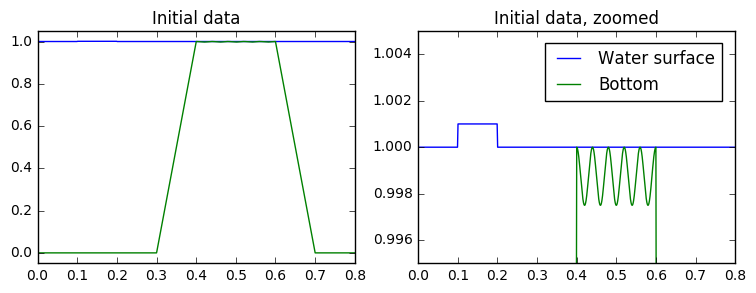

In [5]:
# Plot depth $h$ and momentum $hu$ side by side for $t=0,0.2,0.5$.
fig0, ax0 = plt.subplots(1,2,figsize=(9,3))
ax0[0].plot(x,w0)
ax0[0].plot(xfine,btmf)
ax0[1].plot(x,w0)
ax0[1].plot(xfine,btmf)
ax0[0].set_xlim((0,0.8))
ax0[1].set_xlim((0,0.8))
ax0[0].set_ylim((-0.05,1.05))
ax0[1].set_ylim((0.995,1.005))
ax0[0].set_title('Initial data')
ax0[1].set_title('Initial data, zoomed')
ax0[1].ticklabel_format(style='plain',useOffset=False,axis='y')
ax0[1].legend(['Water surface','Bottom'],loc=(0.4,0.7))
plt.show()
fig0.savefig('SPSS_init.png')

In [3]:
fig1, ax1 = plt.subplots(3,2,figsize=(11,8))
for i in range(3):
    ax1[i,0].plot(x,w1[i])
    ax1[i,1].plot(x,w1[i])
    ax1[i,1].plot(xfine,btmf)
    ax1[i,0].set_xlim((-1,0.65))
    ax1[i,1].set_xlim((0.395,0.445))
    ax1[i,0].set_ylim((0.9994,1.001))
    ax1[i,1].set_ylim((0.9973,1.001))
    ax1[i,0].set_title('Solution w(x,t) at t = '+str(T[i]))
    ax1[i,1].set_title('Solution w(x,t) at t = '+str(T[i])+', zoomed')
    ax1[i,1].legend(['Water surface', 'Bottom'],loc=(0.54,0.1))
    for j in range(2):
        ax1[i,j].ticklabel_format(style='plain',useOffset=False,axis='y')
    ax1[i,1].set_yticks([0.9975,0.9985,0.9995,1.0005])
    ax1[i,0].set_yticks(np.linspace(0.9995,1.001,4))
fig1.subplots_adjust(hspace=0.4,wspace = 0.2)
fig1.savefig('SPSS_sol.png')